In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as  sns
from matplotlib import pyplot as plt
from mltools.eda import eda


sns.set_style("whitegrid")

In [2]:
train_file  = 'train.csv'
test_file  = 'test.csv'
target_col = 'Item_Outlet_Sales'

In [3]:
def extended_describe(dataframe):
    extended_describe_df= dataframe.describe(include='all').T 
    extended_describe_df['null_count']= dataframe.isnull().sum()
    extended_describe_df['unique_count'] = dataframe.apply(lambda x: len(x.unique()))
    return extended_describe_df 

In [4]:
def plot_histograms(df,cols):
    plt.rcParams['figure.figsize'] = [10 , 8 ]
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.distplot(df[col], kde=True, ax=axs)
            else:
                sns.distplot(df[col], kde=True, ax=axs[j])
        else:
            sns.distplot(df[col], kde=True, ax=axs[i, j])


In [5]:
def plot_relplot(df,cols,target):
    plt.rcParams['figure.figsize'] = [6, 4 ]
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
   
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        sns.relplot(x=col, y=target, data=df, aspect=2.0)

In [6]:
def plot_countplot(df,cols):
    cmap = sns.color_palette("Set2")
    plt.rcParams['figure.figsize'] = [10 , 8 ]
    df  = df[cols] if cols else df
    f = pd.melt(df) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False,palette =cmap)
    g.set_xticklabels(rotation=90)
    g = g.map(sns.countplot, 'value')
    
    return g

In [7]:
train_df = pd.read_csv(train_file)

In [8]:
test_df = pd.read_csv(test_file)

In [9]:
extended_describe(train_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null_count,unique_count
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1559
Item_Weight,7060,NaN,NaN,NaN,12.8576,4.64346,4.555,8.77375,12.6,16.85,21.35,1463,416
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5
Item_Visibility,8523,NaN,NaN,NaN,0.066132,0.0515978,0,0.0269895,0.0539309,0.0945853,0.328391,0,7880
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16
Item_MRP,8523,NaN,NaN,NaN,140.993,62.2751,31.29,93.8265,143.013,185.644,266.888,0,5938
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,10
Outlet_Establishment_Year,8523,NaN,NaN,NaN,1997.83,8.37176,1985,1987,1999,2004,2009,0,9
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2410,4
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3


In [10]:
null_df = eda.null_analysis(train_df)
null_df

,counts,percentage
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317


In [11]:
df_numeric = train_df.select_dtypes(exclude='object')

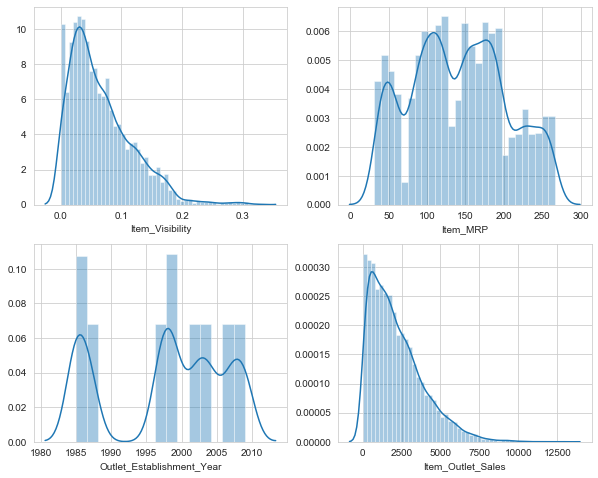

In [12]:
plot_histograms(df_numeric,['Item_Visibility', 'Item_MRP','Outlet_Establishment_Year', 'Item_Outlet_Sales'])

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


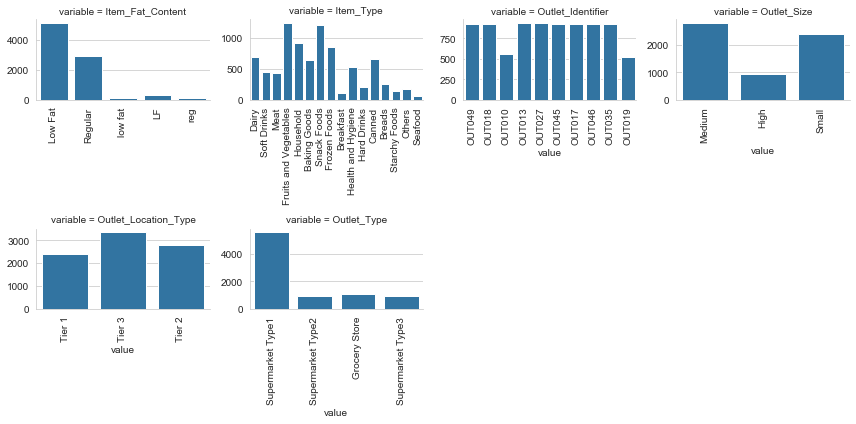

In [13]:
df_categorical = train_df.select_dtypes(include='object')
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
plot_countplot(df_categorical,cat_cols)

In [14]:
rel_cols = [col for col in df_numeric  if col !=target_col]

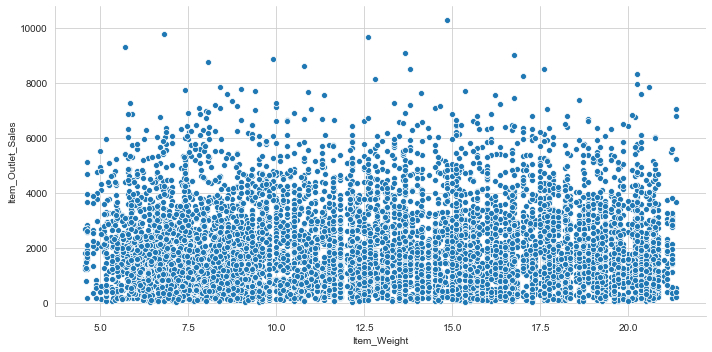

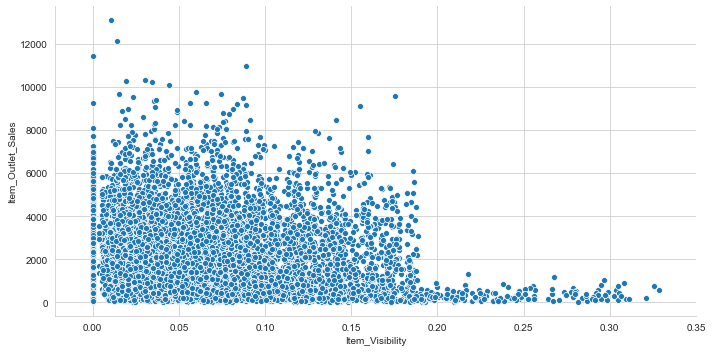

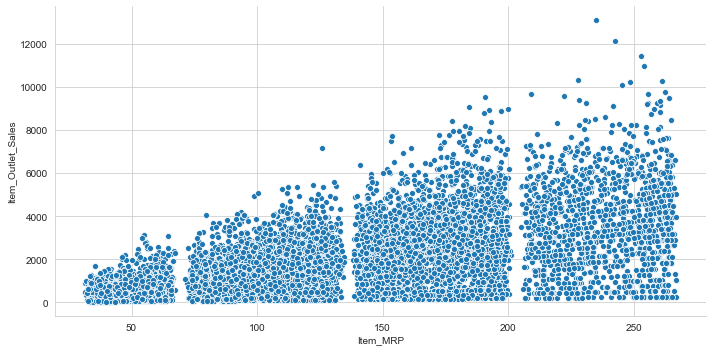

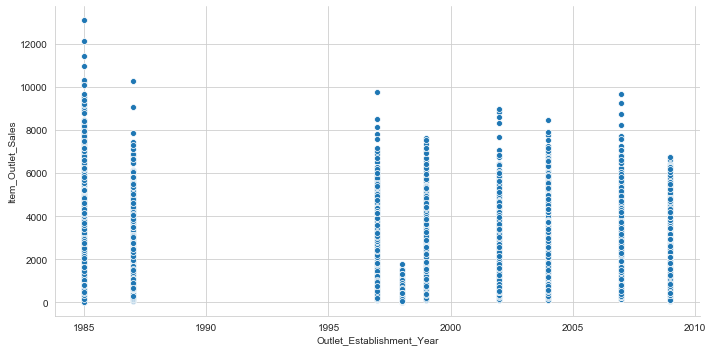

In [15]:
plot_relplot(df_numeric,rel_cols,target_col) 